# Lesson 4 Notes: Analyzing Data from Multiple Files

These are some notes for [Software Carpentry](https://software-carpentry.org/)'s tutorial [*Programming with Python*](http://swcarpentry.github.io/python-novice-inflammation/).  The web page for this lesson can be found [here](http://swcarpentry.github.io/python-novice-inflammation/04-files/).

## The Goal

> Use library functions and loop over files for processing.

## Getting File Names: `glob`

A basic tool:

* Library: `glob`
* Function: `glob`
    * Feed a string with a pattern
    * Use special characters
        * `*` matches zero or more characters
        * `?` matches any single character

In [1]:
import glob

In [2]:
print(glob.glob('data/inflammation*.csv'))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


List of files, but **no order!**

Use `sorted()`.

In [3]:
print(sorted(glob.glob('data/inflammation*.csv')))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


## Repeated Processing: Looping over files

In [4]:
import numpy
import matplotlib.pyplot

Just take the first 3 files.

In [5]:
filenames = sorted(glob.glob('data/inflammation*.csv'))
shortnames = filenames[:3]

Make the same 3-part plot for each file.

data/inflammation-01.csv


/Users/bobtodd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/bobtodd/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


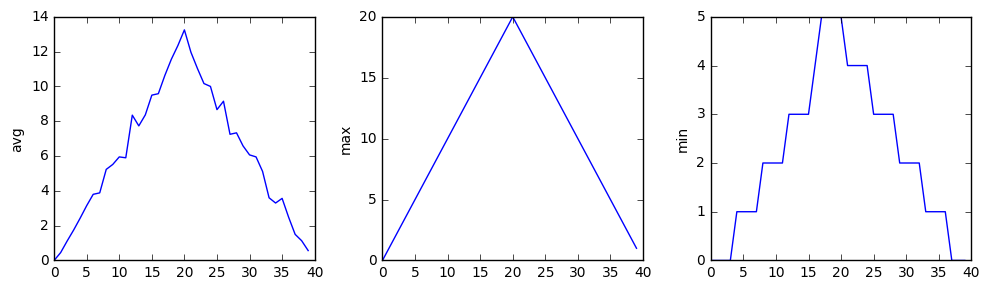

data/inflammation-02.csv


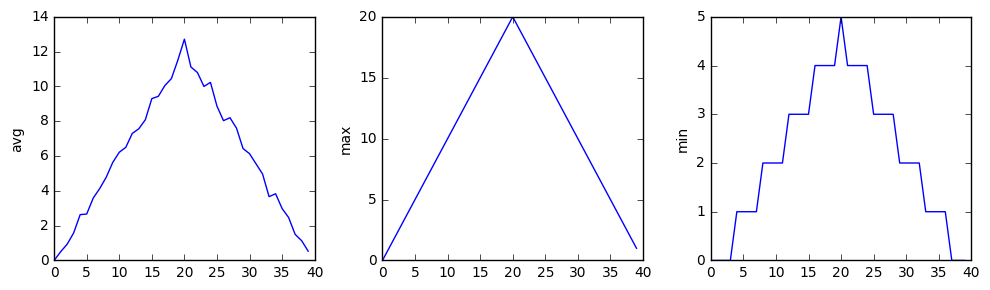

data/inflammation-03.csv


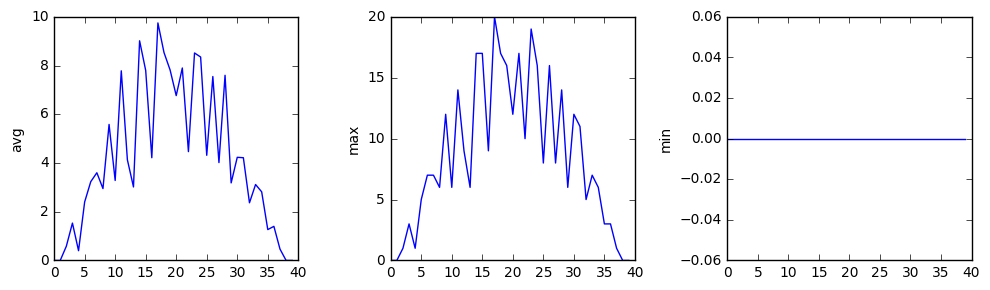

In [6]:
for f in shortnames:
    
    # state which file we're working on
    print(f)
    
    # extract the data
    data = numpy.loadtxt(fname=f, delimiter=',')
    
    # create a figure
    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))
    
    # create three subfigures: 1 row, 3 columns, plot number
    axis1 = fig.add_subplot(1, 3, 1)
    axis2 = fig.add_subplot(1, 3, 2)
    axis3 = fig.add_subplot(1, 3, 3)
    
    # make 1st plot
    axis1.set_ylabel('avg')
    axis1.plot(numpy.mean(data, axis=0))
    
    # make 2nd plot
    axis2.set_ylabel('max')
    axis2.plot(numpy.max(data, axis=0))
    
    # make 3rd plot
    axis3.set_ylabel('min')
    axis3.plot(numpy.min(data, axis=0))
    
    # display the figure
    fig.tight_layout()
    matplotlib.pyplot.show()

Whaddya know!  The first two files show the same behavior.  But the 3rd file seems a little more plausible:

* rapid onsets, slow falloffs;
* variation between days.

But we also have

* consistent minimum inflammation of 0.

So someone healthy is in the data.